In [1]:
import pandas as pd
import json 
import random
from PIL import Image

In [2]:
prompt_results_df = pd.read_csv('C:/Users/neals/Desktop/practicum/prompt_results_classification.csv')
prompt_results_df['prompt'] = prompt_results_df['prompt'].fillna('')
prompt_results_df.head()

image_id   image_file                                         image_path  \
0         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
1         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
2         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
3         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
4         1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   

                                              prompt  \
0                                                      
1  Question: is there a plane in this image, If y...   
2              Question: is anything moving? Answer:   
3                  Question: Is there a car? Answer:   
4         Question: How many cars are there? Answer:   

                                      generated_text  category  \
0  an aerial view of a parking lot with several y...         1   
1                                                yes         1   
2                                                yes         1   
3                                                yes         1   
4                                                  1         1   

   processing_time  
0         2.130118  
1         1.203270  
2         0.766499  
3         0.862881  
4         0.788784


an aerial view of a dock in the middle of a body of water


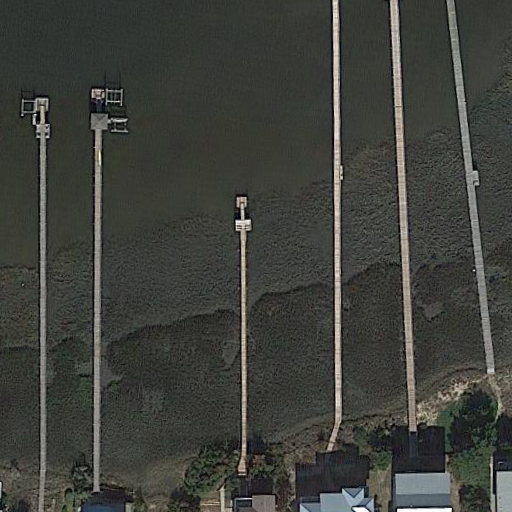

Question: is there a plane in this image, If you are not sure about the answer, say you don't know? Answer:
yes


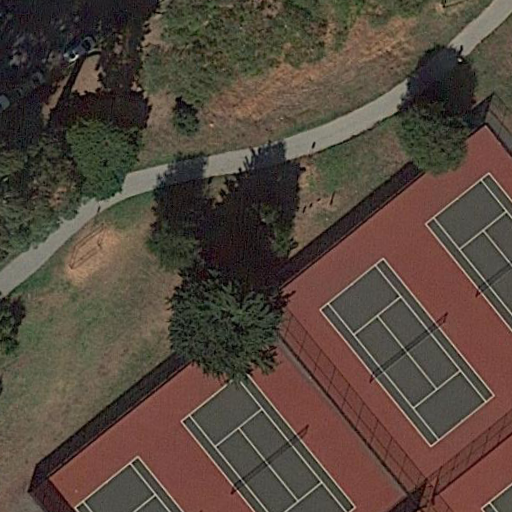

Question: is anything moving? Answer:
no


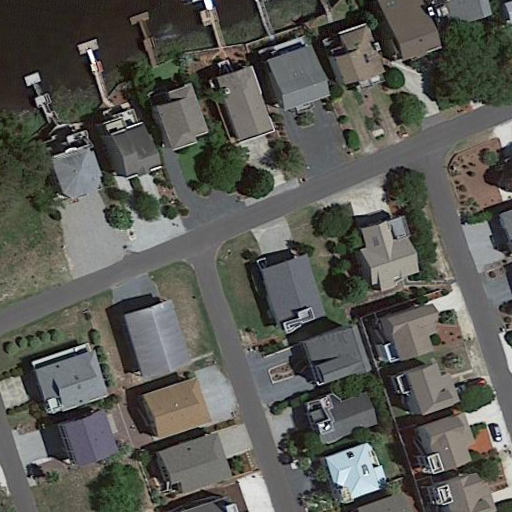

Question: Is there a car? Answer:
yes


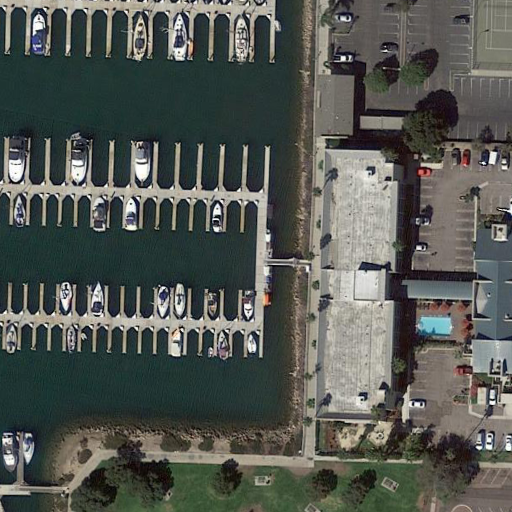

Question: How many cars are there? Answer:
0


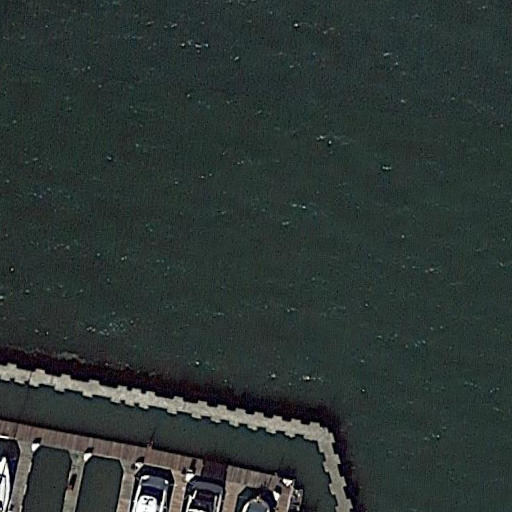

Question: Is there a truck? Answer:
yes


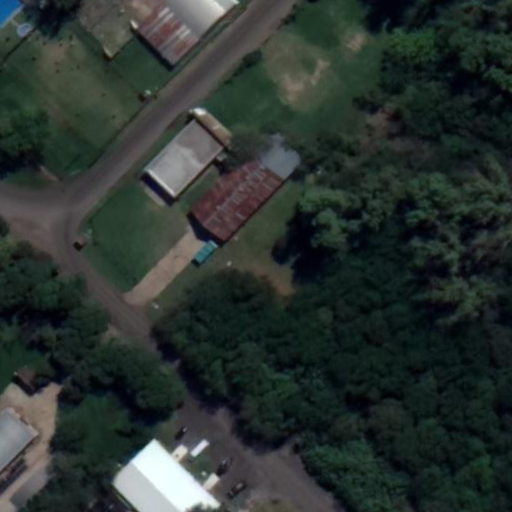

Question: How many trucks are there? Answer:
A lot


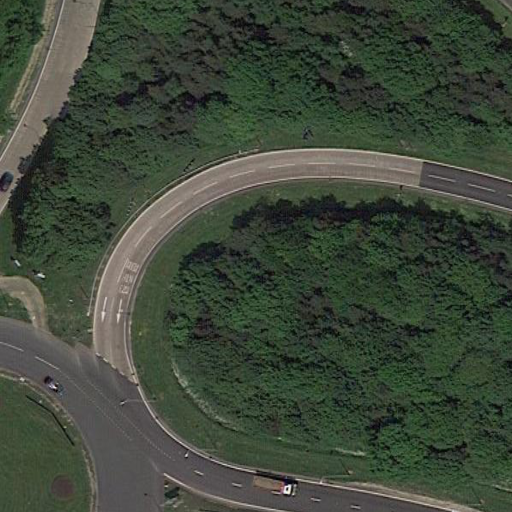

Question: Is there a ship? Answer:
yes


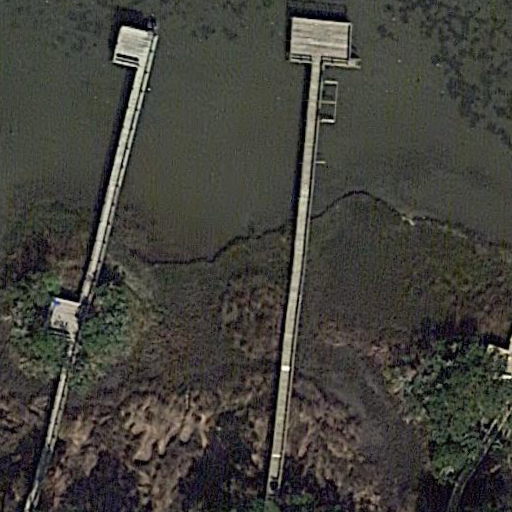

Question: How many ships are there? Answer:
A lot


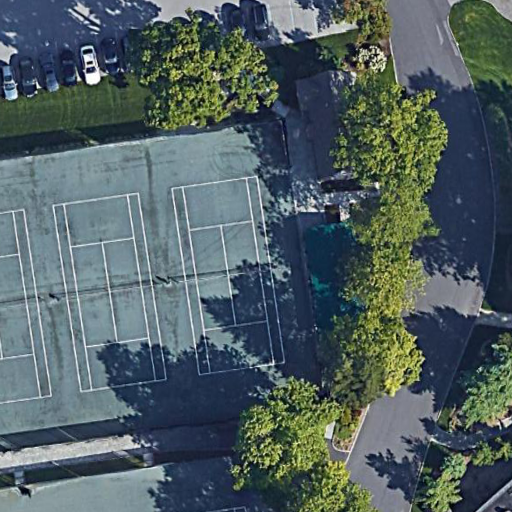

Question: Is there a plane? Answer:
No


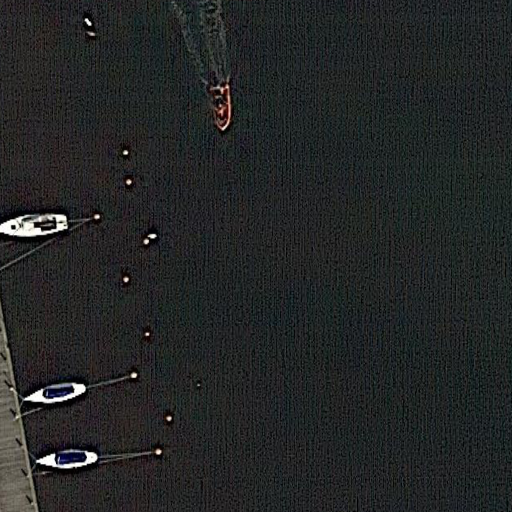

Question: How many planes are there? Answer:
1


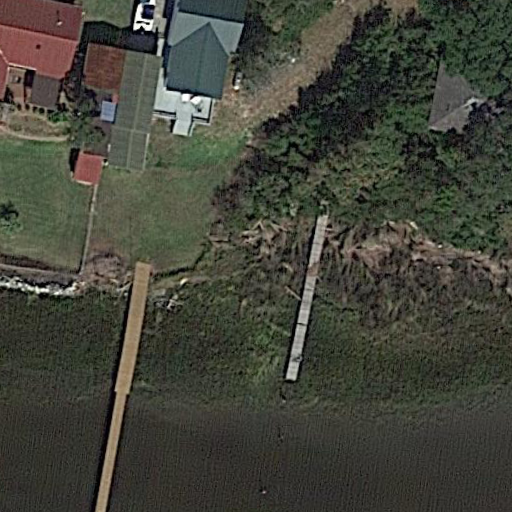

Question: Is there a storage-tank? Answer:
yes


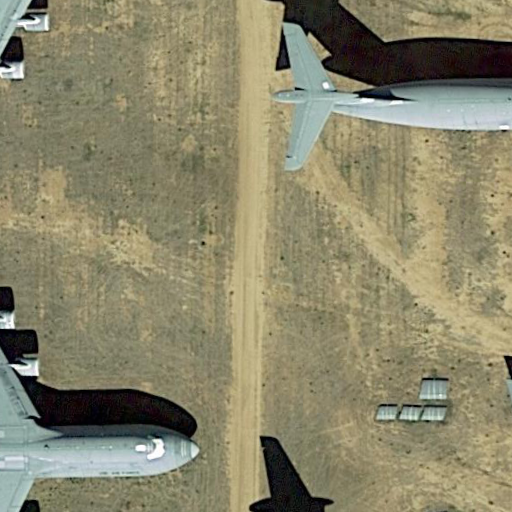

Question: How many storage-tanks are there? Answer:
1


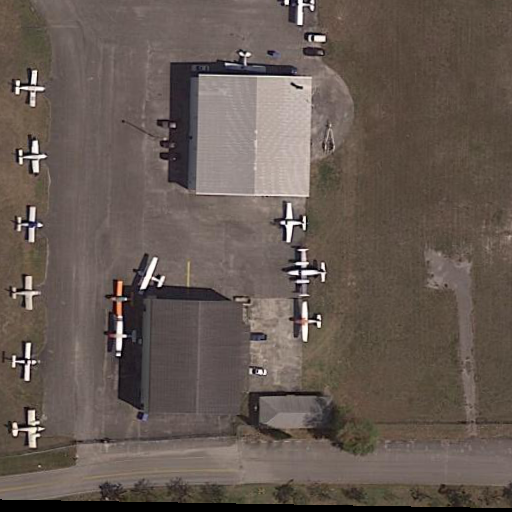

Question: Is there a swimming-pool? Answer:
yes


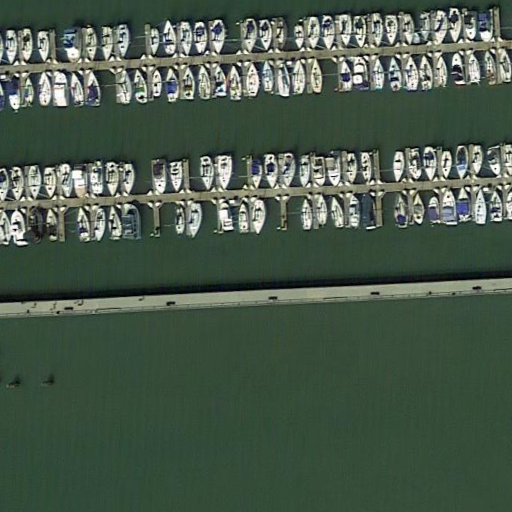

Question: How many swimming-pools are there? Answer:
1


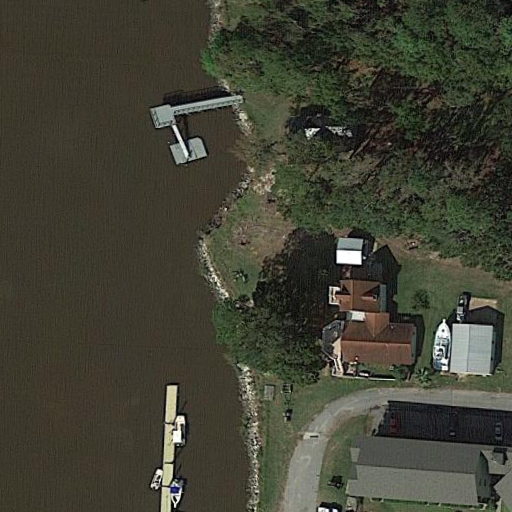

Question: Is there a harbor? Answer:
yes


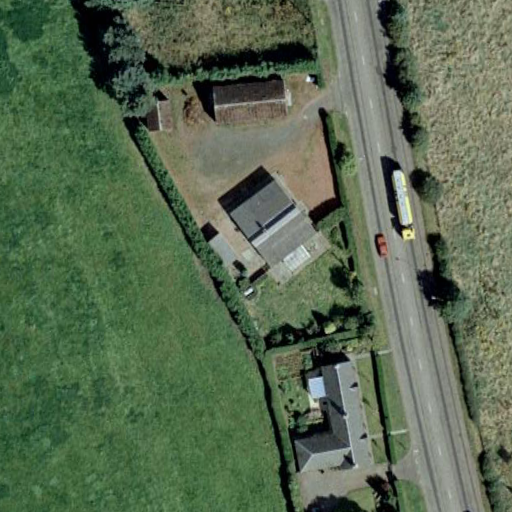

Question: How many harbors are there? Answer:
two


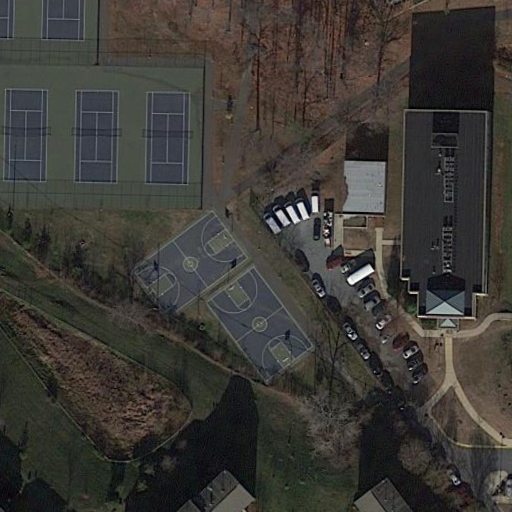

In [3]:

for prompt in list(prompt_results_df['prompt'].unique()):
    print(prompt)
    filtered_df = prompt_results_df[prompt_results_df['prompt']==prompt].reset_index()
    rindex = random.choice(filtered_df.index)
    row=filtered_df.iloc[rindex]
    #print(row)
    img = Image.open(row.image_path)
    print(row.generated_text)
    display(img)

In [4]:
print(prompt_results_df['prompt'].unique())

[''
 "Question: is there a plane in this image, If you are not sure about the answer, say you don't know? Answer:"
 'Question: is anything moving? Answer:'
 'Question: Is there a car? Answer:'
 'Question: How many cars are there? Answer:'
 'Question: Is there a truck? Answer:'
 'Question: How many trucks are there? Answer:'
 'Question: Is there a ship? Answer:'
 'Question: How many ships are there? Answer:'
 'Question: Is there a plane? Answer:'
 'Question: How many planes are there? Answer:'
 'Question: Is there a storage-tank? Answer:'
 'Question: How many storage-tanks are there? Answer:'
 'Question: Is there a swimming-pool? Answer:'
 'Question: How many swimming-pools are there? Answer:'
 'Question: Is there a harbor? Answer:'
 'Question: How many harbors are there? Answer:']


In [5]:
processed_time_df = prompt_results_df.groupby('prompt')['processing_time'].mean().reset_index()
processed_time_df

prompt  processing_time
0                                                             1.181769
1          Question: How many cars are there? Answer:         0.561111
2       Question: How many harbors are there? Answer:         0.730949
3        Question: How many planes are there? Answer:         0.515615
4         Question: How many ships are there? Answer:         0.601957
5   Question: How many storage-tanks are there? An...         0.669958
6   Question: How many swimming-pools are there? A...         0.389590
7        Question: How many trucks are there? Answer:         0.468850
8                   Question: Is there a car? Answer:         0.775663
9                Question: Is there a harbor? Answer:         0.818329
10                Question: Is there a plane? Answer:         0.790252
11                 Question: Is there a ship? Answer:         0.795654
12         Question: Is there a storage-tank? Answer:         0.854190
13        Question: Is there a swimming-pool? Answer:         0.919648
14                Question: Is there a truck? Answer:         0.703135
15              Question: is anything moving? Answer:         0.707257
16  Question: is there a plane in this image, If y...         1.320275

In [6]:
timedf=prompt_results_df[prompt_results_df['prompt']==""]
print(timedf.processing_time.mean())
print(timedf.processing_time.std())

1.1817689217598208
0.2880743125501698


In [7]:
with open('E:/datasets/DOTA_dataset_512/val_coco.json') as f:
    gt_json = json.load(f)

category_map = {cat['id']:cat['name'] for cat in gt_json['categories']}
annotation_df = pd.DataFrame(gt_json['annotations'])
annotation_df['category'] = annotation_df['category_id'].map(category_map)
#annotation_df.head()

In [8]:
category_agg = annotation_df.groupby('image_id')['category'].agg(lambda x: list(set(x))).reset_index()
category_agg.rename(columns={'category': 'category_list'}, inplace=True)
prompt_results_df = prompt_results_df.merge(category_agg, on='image_id', how='left')
#prompt_results_df.head(10)


In [9]:
def correct_class_found(row, class_name):

    cats = row.category_list
    gen_text = row.generated_text

    if class_name in cats and gen_text.lower()=='yes': 
        return 1
    elif gen_text.lower() !='yes': 
        return 1
    #print(cats)
    #print(gen_text)
    return 0

def correct_vehicle_found(row):

    cats = row.category_list
    gen_text = row.generated_text
    vehicle = 'small-vehicle'in cats or 'large-vehicle' in cats
    if vehicle and gen_text.lower()=='yes': 
        return 1
    elif gen_text.lower() != 'yes':
        return 1

    return 0

In [10]:
prompts = prompt_results_df['prompt'].unique()
for prompt in prompts:
    print(prompt)


Question: is there a plane in this image, If you are not sure about the answer, say you don't know? Answer:
Question: is anything moving? Answer:
Question: Is there a car? Answer:
Question: How many cars are there? Answer:
Question: Is there a truck? Answer:
Question: How many trucks are there? Answer:
Question: Is there a ship? Answer:
Question: How many ships are there? Answer:
Question: Is there a plane? Answer:
Question: How many planes are there? Answer:
Question: Is there a storage-tank? Answer:
Question: How many storage-tanks are there? Answer:
Question: Is there a swimming-pool? Answer:
Question: How many swimming-pools are there? Answer:
Question: Is there a harbor? Answer:
Question: How many harbors are there? Answer:


In [11]:
pr_car = prompt_results_df[prompt_results_df['prompt']=='Question: Is there a car? Answer:']
#pr_car['correct'] = pr_car.apply(lambda x: correct_class_found(x,'small-vehicle'), axis=1 )
pr_car['correct'] = pr_car.apply(lambda x: correct_vehicle_found(x), axis=1 )

print(f"{pr_car['correct'].sum()}/{len(pr_car.index)} {100*pr_car['correct'].sum()/len(pr_car.index):.2f}%")

4678/7750 60.36%


C:\Users\neals\AppData\Local\Temp\ipykernel_5208\2199036655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_car['correct'] = pr_car.apply(lambda x: correct_vehicle_found(x), axis=1 )


In [12]:
pr_truck = prompt_results_df[prompt_results_df['prompt']=='Question: Is there a truck? Answer:']
pr_truck['correct'] = pr_truck.apply(lambda x: correct_class_found(x,'large-vehicle'), axis=1 )
#pr_truck['correct'] = pr_truck.apply(lambda x: correct_vehicle_found(x), axis=1 )

print(f"{pr_truck['correct'].sum()}/{len(pr_truck.index)} {100*pr_truck['correct'].sum()/len(pr_truck.index):.2f}%")

1724/7750 22.25%


C:\Users\neals\AppData\Local\Temp\ipykernel_5208\951196044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_truck['correct'] = pr_truck.apply(lambda x: correct_class_found(x,'large-vehicle'), axis=1 )


In [13]:
pr_plane = prompt_results_df[prompt_results_df['prompt']=='Question: Is there a plane? Answer:']
pr_plane['correct'] = pr_plane.apply(lambda x: correct_class_found(x,'plane'), axis=1 )

print(f"{pr_plane['correct'].sum()}/{len(pr_plane.index)} {100*pr_plane['correct'].sum()/len(pr_plane.index):.2f}%")

2599/7750 33.54%


C:\Users\neals\AppData\Local\Temp\ipykernel_5208\3863743411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_plane['correct'] = pr_plane.apply(lambda x: correct_class_found(x,'plane'), axis=1 )


In [14]:
pr_plane = prompt_results_df[prompt_results_df['prompt']== "Question: is there a plane in this image, If you are not sure about the answer, say you don't know? Answer:"]
pr_plane['correct'] = pr_plane.apply(lambda x: correct_class_found(x,'plane'), axis=1 )

print(f"{pr_plane['correct'].sum()}/{len(pr_plane.index)} {100*pr_plane['correct'].sum()/len(pr_plane.index):.2f}%")

C:\Users\neals\AppData\Local\Temp\ipykernel_5208\1736850440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_plane['correct'] = pr_plane.apply(lambda x: correct_class_found(x,'plane'), axis=1 )


1651/7750 21.30%


In [15]:
pr_tank = prompt_results_df[prompt_results_df['prompt']== 'Question: Is there a storage-tank? Answer:']
pr_tank['correct'] = pr_tank.apply(lambda x: correct_class_found(x,'storage-tank'), axis=1 )

print(f"{pr_tank['correct'].sum()}/{len(pr_tank.index)} {100*pr_tank['correct'].sum()/len(pr_tank.index):.2f}%")

C:\Users\neals\AppData\Local\Temp\ipykernel_5208\1763781353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_tank['correct'] = pr_tank.apply(lambda x: correct_class_found(x,'storage-tank'), axis=1 )


1659/7750 21.41%


In [16]:
pr_pool = prompt_results_df[prompt_results_df['prompt']== 'Question: Is there a swimming-pool? Answer:']
pr_pool['correct'] = pr_pool.apply(lambda x: correct_class_found(x,'swimming-pool'), axis=1 )

print(f"{pr_pool['correct'].sum()}/{len(pr_pool.index)} {100*pr_pool['correct'].sum()/len(pr_pool.index):.2f}%")

C:\Users\neals\AppData\Local\Temp\ipykernel_5208\3082335608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_pool['correct'] = pr_pool.apply(lambda x: correct_class_found(x,'swimming-pool'), axis=1 )


1179/7750 15.21%


In [17]:
pr_harbor = prompt_results_df[prompt_results_df['prompt']== 'Question: Is there a harbor? Answer:']
pr_harbor['correct'] = pr_harbor.apply(lambda x: correct_class_found(x,'harbor'), axis=1 )

print(f"{pr_harbor['correct'].sum()}/{len(pr_harbor.index)} {100*pr_harbor['correct'].sum()/len(pr_harbor.index):.2f}%")

2667/7750 34.41%


C:\Users\neals\AppData\Local\Temp\ipykernel_5208\2306431779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_harbor['correct'] = pr_harbor.apply(lambda x: correct_class_found(x,'harbor'), axis=1 )


In [18]:
pr_ship = prompt_results_df[prompt_results_df['prompt']== 'Question: Is there a ship? Answer:']
pr_ship['correct'] = pr_ship.apply(lambda x: correct_class_found(x,'ship'), axis=1 )

print(f"{pr_ship['correct'].sum()}/{len(pr_ship.index)} {100*pr_ship['correct'].sum()/len(pr_ship.index):.2f}%")

2435/7750 31.42%


C:\Users\neals\AppData\Local\Temp\ipykernel_5208\1077238267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_ship['correct'] = pr_ship.apply(lambda x: correct_class_found(x,'ship'), axis=1 )


In [19]:
for id, nam in category_map.items():
    print(f'{id},{nam}')

1,small-vehicle
2,large-vehicle
3,ship
4,harbor
5,baseball-diamond
6,soccer-ball-field
7,ground-track-field
8,swimming-pool
9,roundabout
10,tennis-court
11,basketball-court
12,plane
13,helicopter
14,bridge
15,storage-tank
16,container-crane
